In [ ]:
import keras
from keras import layers

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [ ]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
#Let's also create a separate encoder model:

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
#Now let's train our autoencoder to reconstruct MNIST digits.

#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Now let's train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.2765 - val_loss: 0.1899
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1711 - val_loss: 0.1536
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1437 - val_loss: 0.1328
Epoch 4/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1277 - val_loss: 0.1205
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1176 - val_loss: 0.1125
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1109 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1060 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1024 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 5s 21ms/step - loss: 0.0996 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 5s 21ms/step - loss: 0.0977 - val_lo

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


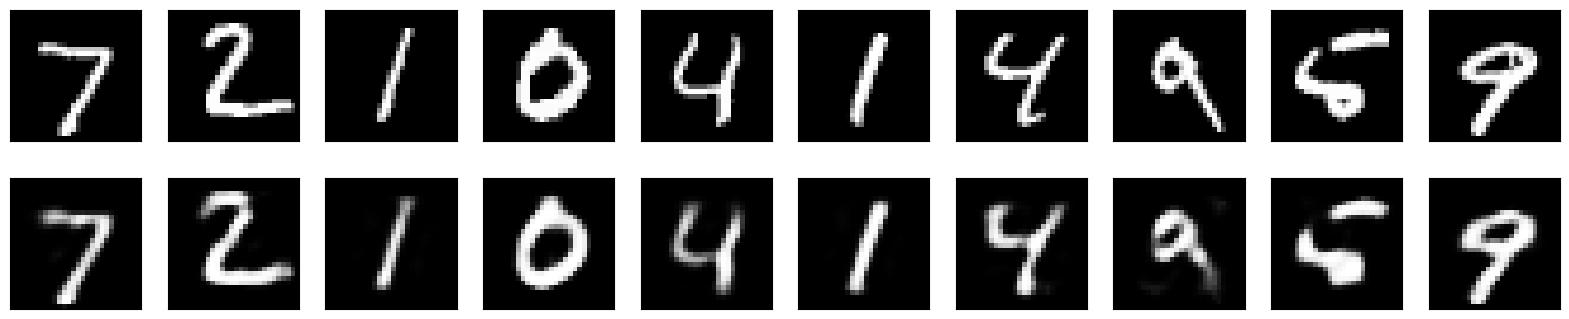

In [ ]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
#Let's also create a separate encoder model:

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
#Now let's train our autoencoder to reconstruct MNIST digits.

#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Now let's train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.2836 - val_loss: 0.1923
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1762 - val_loss: 0.1610
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1528 - val_loss: 0.1429
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1384 - val_loss: 0.1314
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1288 - val_loss: 0.1237
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1221 - val_loss: 0.1179
Epoch 7/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1171 - val_loss: 0.1136
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1134 - val_loss: 0.1106
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1107 - val_loss: 0.1083
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1089 - val_lo

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 2s 5ms/step


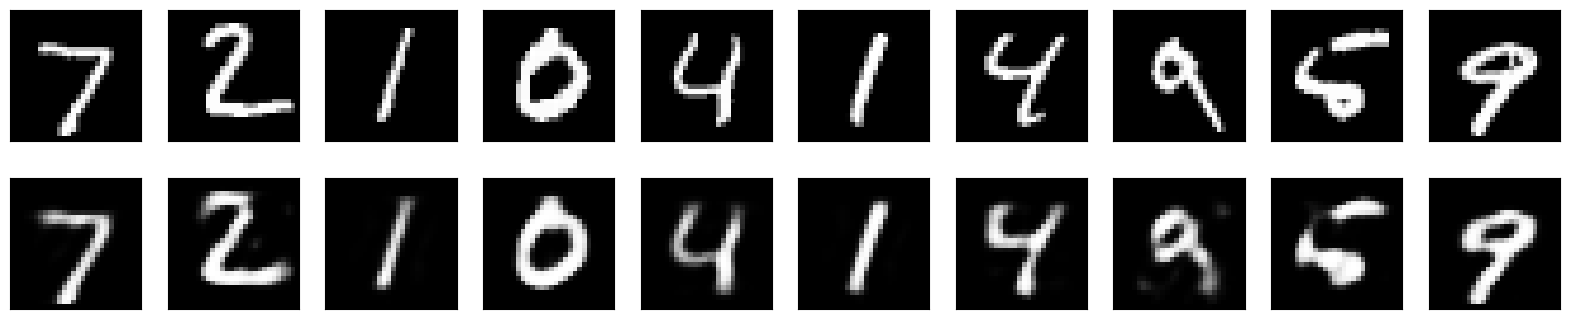

In [ ]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
#Let's also create a separate encoder model:

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
#Now let's train our autoencoder to reconstruct MNIST digits.

#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Now let's train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 18ms/step - loss: 0.2850 - val_loss: 0.1966
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1785 - val_loss: 0.1616
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1523 - val_loss: 0.1421
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1373 - val_loss: 0.1308
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1285 - val_loss: 0.1237
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1223 - val_loss: 0.1183
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1174 - val_loss: 0.1140
Epoch 8/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1136 - val_loss: 0.1108
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1109 - val_loss: 0.1086
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1091 - val_lo

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


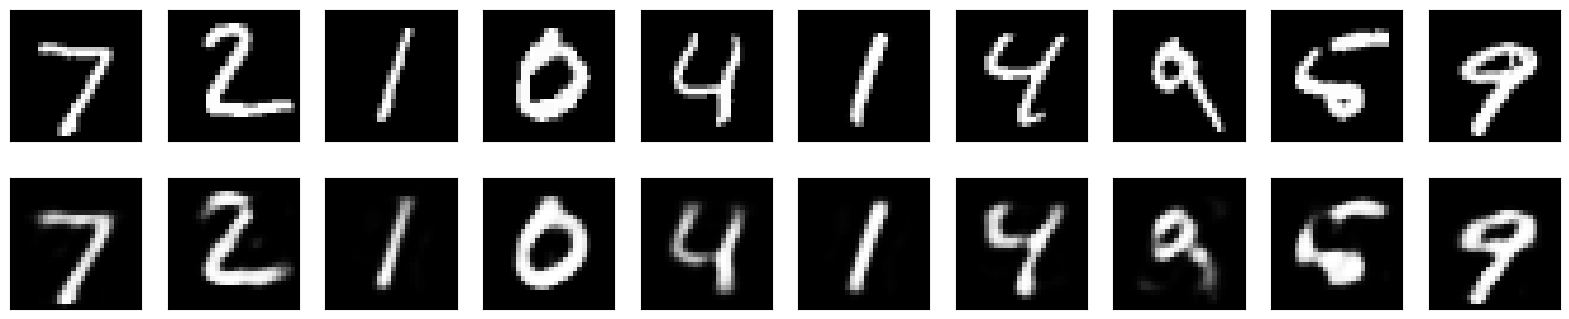

In [ ]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 5s 16ms/step - loss: 0.2413 - val_loss: 0.1635
Epoch 2/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1451 - val_loss: 0.1308
Epoch 3/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1263 - val_loss: 0.1200
Epoch 4/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1185 - val_loss: 0.1140
Epoch 5/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1132 - val_loss: 0.1092
Epoch 6/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1087 - val_loss: 0.1057
Epoch 7/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1055 - val_loss: 0.1038
Epoch 8/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1033 - val_loss: 0.1014
Epoch 9/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1013 - val_loss: 0.0990
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.099

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


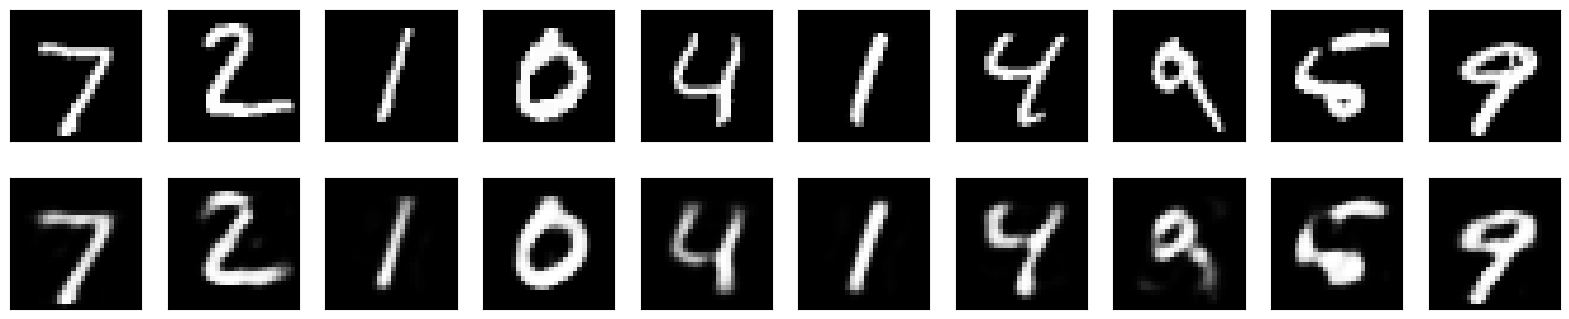

In [ ]:
# Use Matplotlib
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()